In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dasquakes import *
import pickle

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('font', family='normal',size=22)

# Load the SVD analyses

In [2]:
filename = 'sgw/svd.pickle'
file = open(filename, 'rb')
U,S,V,t,f,k,nt,nx = pickle.load(file)
file.close()

filename = 'sch/svd.pickle'
file = open(filename, 'rb')
U_sch,S_sch,V_sch,t_sch,f_sch,k_sch,nt_sch,nx_sch = pickle.load(file)
file.close()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'D. SV 2 Time Series')

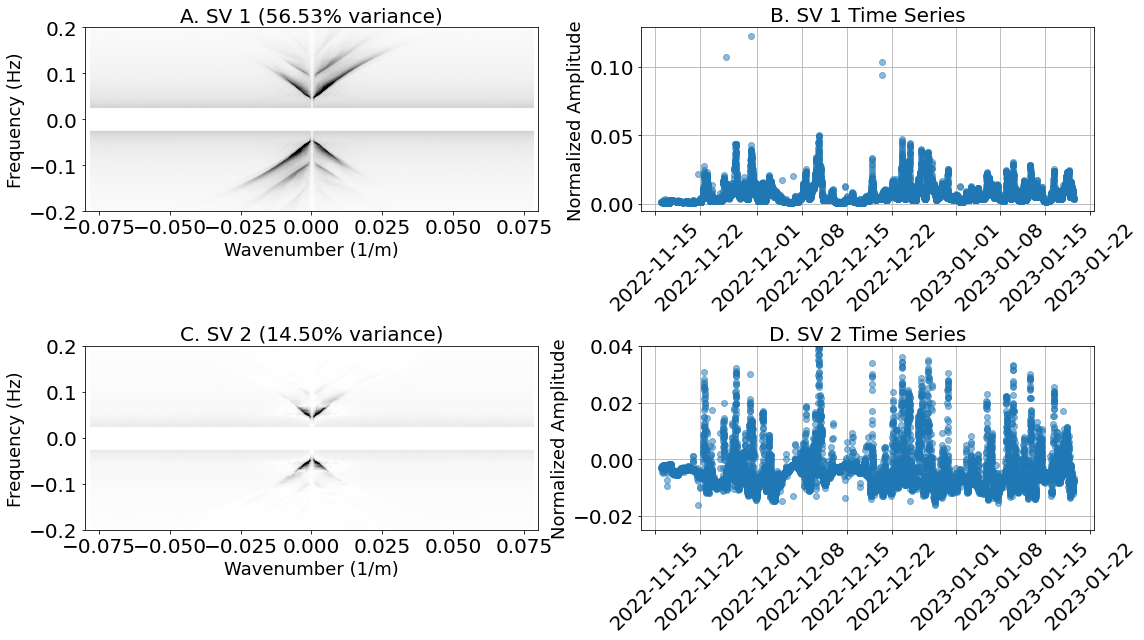

In [3]:
fig,ax=plt.subplots(2,2,figsize=(16,9))
ind=0
for i in (0,1):
    normalization = np.max(np.abs(U_sch[:,5-i]))
    mode = np.abs(U_sch[:,5-i].reshape((nt_sch,nx_sch))) / normalization
    time_series = V_sch[5-i,:]
    variance = 100*S_sch[5-i]/sum(S_sch)
    factor = (-1)**(i+1)
    factor= 1
    plot_svd(f,k,t,mode,factor*time_series,variance,i+1,
            fig=fig, ax1=ax[ind,0],ax2=ax[ind,1],
             flim=0.2,
             klim=0.08)
    ind=ind+1
ax[0][0].set_title('A. ' + ax[0][0].get_title(),fontsize=20)
ax[0][1].set_title('B. ' + ax[0][1].get_title(),fontsize=20)
ax[1][0].set_title('C. ' + ax[1][0].get_title(),fontsize=20)
ax[1][1].set_title('D. ' + ax[1][1].get_title(),fontsize=20)
# plt.show()

# Make a figure to show how useful the SVD is

Searching for files matching: /data/data6/whidbey/whidbey_2022-12-01_00-00*h5
Input fs = 100.0, desired fs = 10
Temporal downsampling factor = 10
Input dx = 3.19, desired dx = 6.38
Spatial downsampling factor = 2
Data dimension: (600, 375)


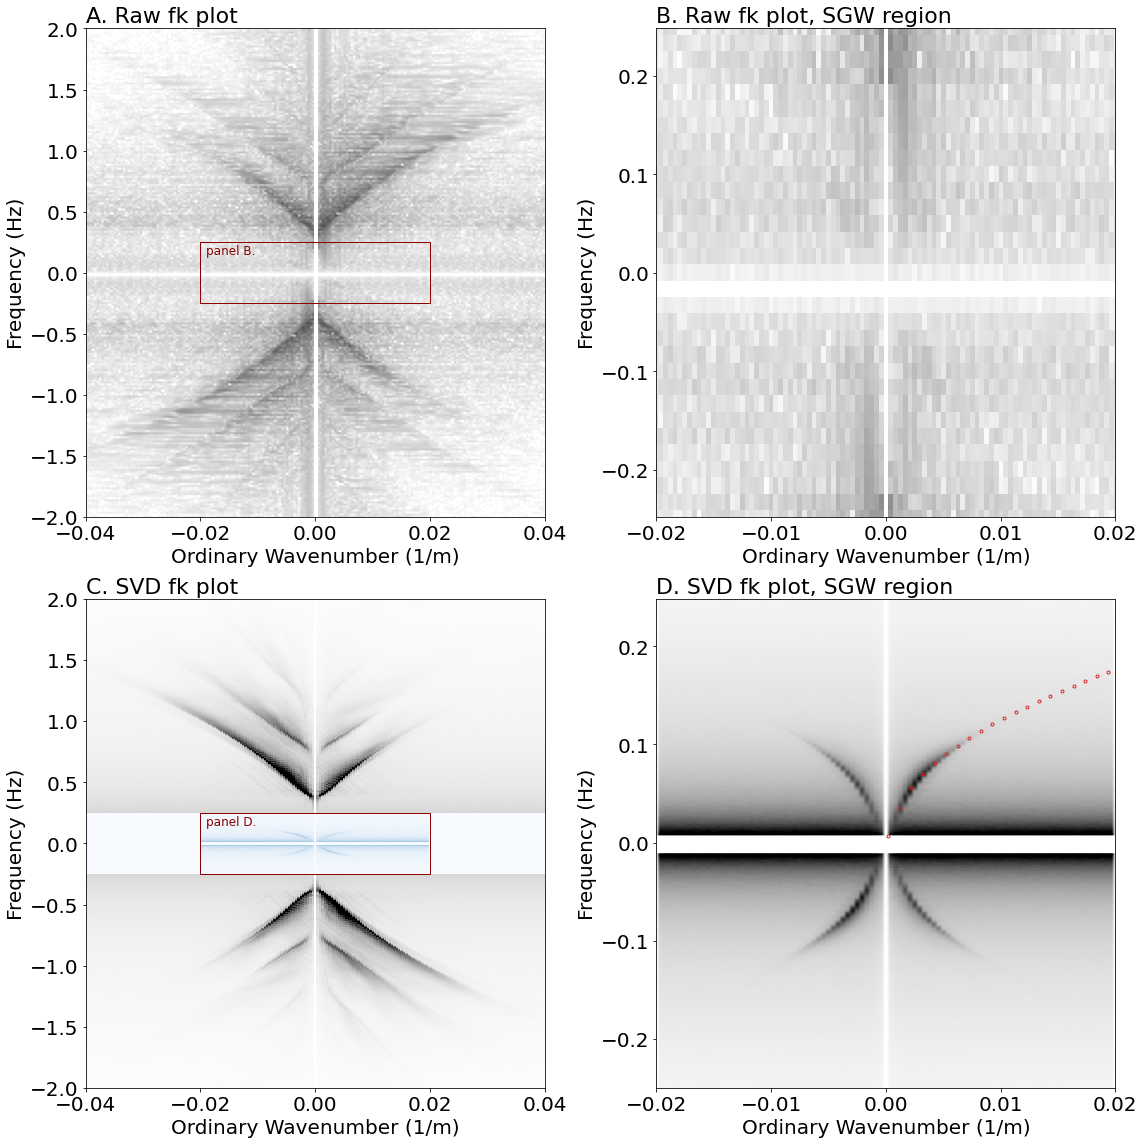

In [18]:
import matplotlib.patches as patches

t0 = datetime.datetime(2022, 12, 1, 0, 0, 0)

ft_raw,f_raw,k_raw = fk_analysis(t0=t0,
                 record_length=1,
                 cable='whidbey'
                 )

kk,ff = np.meshgrid(k_raw,f_raw)
f0 = 0.02
n = 1
filt = np.abs(ff/f0)**n/(1 + np.abs(ff/f0)**n )













fig,ax=plt.subplots(2,2,figsize=(16,16))

ax[0][0].imshow( np.log10(np.abs(ft_raw)).astype(float) * filt,
           aspect='auto',
           extent=[k_raw[0],k_raw[-1],f_raw[0],f_raw[-1]],vmin=0.5,vmax=5.0,cmap='Greys')
ax[0][0].set_ylim([-2,2])
ax[0][0].set_xlim([-0.04,0.04])
ax[0][0].set_title('A. Raw fk plot',fontsize=22,loc='left')
rect = patches.Rectangle((-0.02, -0.25), 0.04, 0.5, linewidth=1, edgecolor='darkred', facecolor='none')
ax[0][0].add_patch(rect)
ax[0][0].text(-0.019,0.15,'panel B.',fontsize=12,color='darkred')

ax[0][1].imshow( np.log10(np.abs(ft_raw)).astype(float) * filt,
           aspect='auto',
           extent=[k_raw[0],k_raw[-1],f_raw[0],f_raw[-1]],vmin=0.5,vmax=5.0,cmap='Greys')
ax[0][1].set_ylim([-0.248333,0.248333])
ax[0][1].set_xlim([-0.02,0.02])
ax[0][1].set_title('B. Raw fk plot, SGW region',fontsize=22,loc='left')



mode_sch = np.abs(U_sch[:,5].reshape((nt_sch,nx_sch)))
ax[1][0].pcolormesh(k_sch,f_sch,mode_sch,vmin=0,vmax=0.01,cmap='gray_r')
mode_sgw = np.abs(U[:,5].reshape((nt,nx)))
ax[1][0].pcolormesh(k,f,mode_sgw,vmin=0,vmax=0.05,cmap='Blues')

rect = patches.Rectangle((-0.02, -0.25), 0.04, 0.5, linewidth=1, edgecolor='darkred', facecolor='none')
ax[1][0].add_patch(rect)
# ax[1][0].text(-0.039,1.8,'C.',fontsize=22)
ax[1][0].set_title('C. SVD fk plot',fontsize=22,loc='left')
ax[1][0].text(-0.019,0.15,'panel D.',fontsize=12,color='darkred')
ax[1][0].set_xlim([-0.04,0.04])
ax[1][0].set_ylim([-2,2])



ax[1][1].imshow(mode_sgw,aspect='auto',vmin=0,vmax=0.02,extent=[k[0],k[-1],f[0],f[-1]],cmap='gray_r')
kk = np.linspace(0,0.02,100)

kang = kk *2 * np.pi
fsgw = np.sqrt(9.8*kang*np.tanh(100*kang)) /2 / np.pi
ax[1][1].plot(kk[1:-1:5], fsgw[1:-1:5],'.',alpha=1,c='C3',markerfacecolor='none')

ax[1][1].set_xlim([-0.02,0.02])
ax[1][1].set_title('D. SVD fk plot, SGW region',fontsize=22,loc='left')

for row in ax:
    for axx in row:
        axx.set_xlabel('Ordinary Wavenumber (1/m)',fontsize=20)
        axx.set_ylabel('Frequency (Hz)',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
k1 = 0.01
k2 = 0.011
f1 = 0.5
f2 = 0.49

cp = (f1+f2)/(k1+k2)
cm = np.abs(f1-f2)/np.abs(k1-k2)
print(cp)
print(cm)

In [ ]:
def make_windowed_plot(time_series,t1,t2,
                      timestep = 600 # 10 minutes in units of seconds
                      ):
    
    t_window = np.where((t>t1) & (t<t2))[0]
    tw = t[t_window]
    ts =  time_series[t_window]
    ft = np.fft.fftshift(np.fft.fft(ts))
    f = np.fft.fftshift(np.fft.fftfreq(len(ts),d=timestep))

    fig,ax=plt.subplots(3,1,figsize=(12,12))
    plt.subplot(3,1,1)
    plt.title('A. Time series PSD',fontsize=20)
    plt.plot(tw,ts,'.')
    plt.xlim([t1,t2])
#     plt.ylim([0.0125,0.0325])
    plt.grid()
    ax[0].minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.xticks(rotation=70)

    plt.subplot(3,1,2)
    plt.title('B. SV time series PSD',fontsize=20)
    tides = np.array((12.4206012,12,12.65834751,
                      23.93447213,25.81933871,
                     6.210300601,4.140200401,8.177140247,6,6.269173724))/24
    for i in tides: plt.plot([i,i],[0.21,0.25],'--r')
#     plt.semilogx(1/f/3600/24,np.abs(ft))
    plt.loglog(1/f/3600/24,np.abs(ft)**2)
    plt.ylabel('SV Spectral Amplitude (1/Hz)', fontsize=18)
    plt.xlabel('Period (Days)',fontsize=18)
    plt.grid()
    
    plt.subplot(3,1,3)
    plt.title('C. Zoomed in SV time series PSD',fontsize=20)
    for i in tides: plt.plot([i,i],[0.001,100],'--',c='C1')
    plt.plot(1/f/3600,np.abs(ft)**2)
#     plt.xlim([0.1,1.25])
    plt.xlim(24*np.array([0.49,0.54]))
    plt.ylim([0.001,75])
    plt.ylabel('SV Spectral Amplitude (1/Hz)', fontsize=18)
    plt.xlabel('Period (Days)',fontsize=18)
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    

t0 = datetime.datetime(2022, 11, 14, 1, 0)
t1 = t0 + datetime.timedelta(days=70)
time_range = [t0,t1]

make_windowed_plot(-V[5,:],time_range[0],time_range[1])
make_windowed_plot(V[4,:],time_range[0],time_range[1])


In [ ]:
f = np.fft.fftshift(np.fft.fftfreq(len(V[5,:]),d=600))
for i in np.arange(4800,4813):
    print(1/f[i]/3600)

In [ ]:
from libcomcat.search import search
from libcomcat.dataframes import get_summary_data_frame
import pandas as pd

events = search(starttime = datetime.datetime(2022, 11, 28, 0, 0), 
                endtime   = datetime.datetime(2022, 12, 1, 0, 0),
                maxradiuskm=600,
                minmagnitude=2.0,
                latitude=47.65, 
                longitude=-122.31)

print("Returned %s events" % len(events))

In [ ]:
event_df = get_summary_data_frame(events)
event_df = event_df.sort_values(by=['time'],ascending=False)
event_df

# Examine the largest amplitude event

In [ ]:
plt.subplots(figsize=(16,9))
plt.scatter(t,V[5,:])
plt.scatter(t,V[4,:])
# plt.xlim([t[2000],t[2100]])
ind=2022
plt.scatter(t[ind],V[5,ind],s=100)
plt.scatter(t[ind],V[4,ind],s=100)
plt.grid()
plt.show()

In [ ]:
# fig,ax=plt.subplots(1,3,figsize=(16,4.5),sharey=True)
# for i,ind in enumerate((1462,1463,1464)):
#     plt.subplot(1,3,i+1)
#     reconstruction = S[5]*V[5,ind]*U[:,5].reshape((nt,nx)) \
#                     + S[4]*V[4,ind]*U[:,4].reshape((nt,nx))
#     c=plt.pcolormesh(k,f,np.log10(reconstruction),vmin=1,vmax=6)
#     plt.title(t[ind])
# #     plt.colorbar(c)
# plt.show()

# Compare with met station data

In [ ]:
# Fetch met data
from meteostat import Point, Hourly

from datetime import timedelta
location = Point(48.12, -122.53, 0)
data = []
data = Hourly(location, t0 - timedelta(days=1), t1)
data = data.fetch()
wspd = np.array(data.wspd)
wtime= np.array(data.index)
wdir = np.array(data.wdir)
wspd2= np.abs(wspd*np.sin(wdir))
data

In [ ]:
# Interpolate onto same time axis
def totimestamp(dt64):
     return (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

ts = V[5,:]
ts2 = V[4,:]    

t_ts = np.array( [datetime.datetime.timestamp(x) for x in t])
wtime_ts = np.array( [totimestamp(x) for x in wtime])

from scipy.interpolate import interp1d
interp = interp1d(t_ts,ts)
interp2 = interp1d(t_ts,ts2)

mx = np.max(np.where(wtime_ts < t_ts[-1]))
time_interp = wtime[79:mx]
wspd_interp = wspd[79:mx]
mode_interp = interp(wtime_ts[79:mx])

In [ ]:
t00=1
windo = slice(t00+100,t00+1300,1)
n = len(wspd[windo])
dt = (np.arange(n) - n/2)/6
xc = np.correlate(wspd[windo],-interp(wtime_ts[windo]),mode='same')
xc2= np.correlate(wspd[windo],-interp2(wtime_ts[windo]),mode='same')

xc = xc / np.linalg.norm(wspd[windo]) / np.linalg.norm(-interp(wtime_ts[windo]))
xc2 = xc2 / np.linalg.norm(wspd[windo]) / np.linalg.norm(-interp2(wtime_ts[windo]))

plt.subplots()
plt.plot(dt,xc)
plt.plot(dt,xc2)
plt.title(f'First SV Lag time over:  {dt[np.argmax(xc)]:.2f} hours\n'+
          f'Second SV Lag time over:  {dt[np.argmax(xc2)]:.2f} hours')
plt.show()

max(xc)

# Plot variation with the windspeed

In [ ]:
plt.subplots(3,1,figsize=(12,12), gridspec_kw={'height_ratios': [1, 1, 2]})

plt.subplot(3,1,1)
plt.title('A. Windspeed and SV 1 temporal evolution',loc='left',fontsize=20)
plt.plot(time_interp[:668],wspd_interp[:668],label='Windspeed (km/h)')
plt.plot(time_interp[:668],-mode_interp[:668]*600,'.',label=r'First SV $\times 600$',alpha=1)
plt.grid()
plt.legend(fontsize=15)
plt.xticks(rotation=45)

plt.subplot(3,1,2)
plt.title("A. continued",loc='left',fontsize=20)
plt.plot(time_interp[668:],wspd_interp[668:],label='Windspeed (km/h)')
plt.plot(time_interp[668:],-mode_interp[668:]*600,'.',label=r'First SV $\times 600$',alpha=1)
plt.xticks(rotation=45)


plt.tight_layout()
plt.grid()




# Calculate the point density
from scipy.stats import gaussian_kde
from scipy.stats import linregress
xy = np.vstack([-V[5,:],V[4,:]])
z = gaussian_kde(xy)(xy)

# fig,ax=plt.subplots(figsize=(16,9))
plt.subplot(3,1,3)
plt.title('B. Covariation between SV 1 and SV 2',loc='left',fontsize=20)

m1 = np.log10(np.abs(V[5,:].flatten()))
m2 = V[4,:].flatten()

plt.scatter(m1,m2,alpha=0.5,c=z,s=2)

bins = np.linspace(-3,-1.5,10)
db = np.mean(np.diff(bins))/2
for b in bins:
    val = np.mean(m2[(m1>b-db) & (m1<b+db)])
    bar = np.std(m2[(m1>b-db) & (m1<b+db)])
    plt.errorbar(b,val,yerr=bar,c='C3')
    plt.plot(b,val,'o',c='C3')

plt.grid()
plt.xlim([-3.5,-1.2])
plt.ylim([-.024, .05])
plt.xlabel('log$_{10}$(- SV 1)',fontsize=20)
plt.ylabel('SV 2',fontsize=20)






plt.show()
# plt.savefig('/Users/bradlipovsky/Documents/wind.png')

In [ ]:
fuckingtimestamps = []
for fuckingbullshit in t:
    fuckingtimestamps.append(datetime.datetime.timestamp(fuckingbullshit))
fuckingtimestamps = np.array(fuckingtimestamps)

In [ ]:
sl = slice(8225,8425,1)

plt.subplots(figsize=(16,9))
plt.plot(t[sl],-V[5,sl],'.')
plt.plot(t[sl],V[4,sl],'.')
plt.ylim([-0.05,0.05])

In [ ]:
slices = [slice(925,1000,1),slice(1000,1050,1),slice(1100,1150,1),slice(1350,1450,1),slice(1600,1750,1),
         slice(1900,2200,1),slice(3300,3800,1),slice(4700,4800,1),slice(5500,5650,1),slice(5700,5900,1),
         slice(5900,6050,1),slice(8225,8425,1)]

plt.subplots(4,3,figsize=(16,12))

for i,sl in enumerate(slices):
    plt.subplot(4,3,i+1)
#     plt.plot(-V[5,sl],V[4,sl],c='lightgrey',alpha=0.5)
    plt.scatter( -V[5,sl],V[4,sl],c = fuckingtimestamps[sl])
    plt.ylim([-0.05,0.05])
    plt.xlim([0,0.06])
    plt.text(0.001,0.04,f'{t[sl][0]}')
    plt.xlabel('SV 1',fontsize=20)
    plt.ylabel('SV 2',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
plt.subplots(figsize=(16,9))
plt.plot(t,-V[5,:],'.')
plt.plot(t,V[4,:],'.')

ind = 3000
plt.scatter(t[ind],-V[5,ind],s=100,c='k')
plt.scatter(t[ind],V[4,ind],s=100,c='k')

plt.grid()
# plt.xlim([t[5470],t[5750]])

plt.ylim([-0.04,0.06])
plt.show()

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,4.5),sharey=True)
for i,ind in enumerate((3000,3001,3002)):
    plt.subplot(1,3,i+1)
    reconstruction = S[5]*V[5,ind]*U[:,5].reshape((nt,nx)) \
                    + S[4]*V[4,ind]*U[:,4].reshape((nt,nx))
    c=plt.pcolormesh(k,f,np.log10(reconstruction),vmin=1,vmax=6)
    plt.title(t[ind])
#     plt.colorbar(c)
plt.show()

# What is the effect of the fk filter?

In [ ]:

filename = 'svd.pickle'
file = open('no-fk-filter-1-day/svd.pickle', 'rb')
Unofk1d,Snofk1d,Vnofk1d,tnofk1d,fnofk1d,knofk1d,ntnofk1d,nxnofk1d = pickle.load(file)
file.close()


filename = 'svd.pickle'
file = open('fk-filter-1-day/svd.pickle', 'rb')
Ufk1d,Sfk1d,Vfk1d,tfk1d,ffk1d,kfk1d,ntfk1d,nxfk1d = pickle.load(file)
file.close()

In [ ]:
np.std(Vnofk1d[4,:])**2 / np.std(Vnofk1d[5,:])**2

In [ ]:
data = [0.1, 0.2, 0.3, 1, 4, 56, 345, 345345, 34534, 345345345345,  35345345]
plt.plot(data,'o')
plt.xscale('log')
plt.grid()

# Compare  SGW with  Sch

In [ ]:
plt.subplots(3,1,figsize=(12,12), gridspec_kw={'height_ratios': [0.75, 0.75, 2]})

plt.subplot(3,1,1)
plt.title('A. Wind speed and Scholte wave time series',loc='left',fontsize=20)
plt.plot(time_interp[:668],wspd_interp[:668],label='Windspeed (km/h)')
plt.plot(time_interp[:668],-mode_interp[:668]*600,'.',label=r'First SV $\times 600$',alpha=1)
plt.grid()
plt.legend(fontsize=15)
plt.xticks(rotation=45)

plt.subplot(3,1,2)
plt.title("A. continued",loc='left',fontsize=20)
plt.plot(time_interp[668:],wspd_interp[668:],label='Windspeed (km/h)')
plt.plot(time_interp[668:],-mode_interp[668:]*600,'.',label=r'First SV $\times 600$',alpha=1)
plt.xticks(rotation=45)


plt.tight_layout()
plt.grid()



ax3=plt.subplot(3,1,3)


# plt.subplots(figsize=(16,9))
# this = V_sch[5,:]*S_sch[5]
# that = -V[5,:]*S[5]
this = V_sch[5,:]*S_sch[5]
that = -V[5,:]*S[5]
xy = np.vstack([this, that])
z = gaussian_kde(xy)(xy)
plt.scatter(that,this,alpha=1.0,c=z)
x = np.array([10**5.5,10**5.75])
plt.plot(x,3*x,'-k')
# plt.plot(x,14e-7*x**2,'-k')
# plt.plot(x,1.8e-17*x**4,'-k')
plt.xscale('log')
plt.yscale('log')
plt.title('B. Scholte wave and SGW covariation',loc='left',fontsize=20)
plt.ylabel('Scholte Wave\nSpectral Amplitude (rad)',fontsize=20)
plt.xlabel('SGW Spectral Amplitude (rad)',fontsize=20)
plt.xlim([1e3,1e6])
plt.ylim([10**(4.5),10**(7)])
ax3.set_aspect(1.0)
plt.grid()
plt.show()

In [ ]:
plt.subplots(2,1,figsize=(12,12), gridspec_kw={'height_ratios': [0.75, 0.75, 2]})

plt.subplot(2,1,1)
plt.title('Wind speed and Scholte wave time series',loc='left',fontsize=20)
plt.plot(time_interp[:668],wspd_interp[:668],label='Windspeed (km/h)')
plt.plot(time_interp[:668],-mode_interp[:668]*600,'.',label=r'First SV $\times 600$',alpha=1)
plt.grid()
plt.legend(fontsize=15)
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.title("continued",loc='left',fontsize=20)
plt.plot(time_interp[668:],wspd_interp[668:],label='Windspeed (km/h)')
plt.plot(time_interp[668:],-mode_interp[668:]*600,'.',label=r'First SV $\times 600$',alpha=1)
plt.xticks(rotation=45)


plt.tight_layout()
plt.grid()



# ax3=plt.subplot(3,1,3)


# plt.subplots(figsize=(16,9))
# this = V_sch[5,:]*S_sch[5]
# that = -V[5,:]*S[5]
# this = V_sch[5,:]*S_sch[5]
# that = -V[5,:]*S[5]
# xy = np.vstack([this, that])
# z = gaussian_kde(xy)(xy)
# plt.scatter(that,this,alpha=1.0,c=z)
# x = np.array([10**5.5,10**5.75])
# plt.plot(x,3*x,'-k')
# # plt.plot(x,14e-7*x**2,'-k')
# # plt.plot(x,1.8e-17*x**4,'-k')
# plt.xscale('log')
# plt.yscale('log')
# plt.title('B. Scholte wave and SGW covariation',loc='left',fontsize=20)
# plt.ylabel('Scholte Wave\nSpectral Amplitude (rad)',fontsize=20)
# plt.xlabel('SGW Spectral Amplitude (rad)',fontsize=20)
# plt.xlim([1e3,1e6])
# plt.ylim([10**(4.5),10**(7)])
# ax3.set_aspect(1.0)
# plt.grid()
plt.show()